In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize,sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from bokeh.io import output_notebook
from bokeh.plotting import show,figure
%matplotlib inline
from sklearn.manifold import TSNE

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /usr/share/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [4]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
#tokenize text

In [7]:
gberg_sent_tokens=sent_tokenize(gutenberg.raw())

In [8]:
gberg_sents=gutenberg.sents()

In [9]:
gberg_sents[7]

['Between',
 '_them_',
 'it',
 'was',
 'more',
 'the',
 'intimacy',
 'of',
 'sisters',
 '.']

In [10]:
 model=Word2Vec(sentences=gberg_sents,size=64,window=10,sg=1,min_count=5,seed=42,workers=5)

In [11]:
model['dog']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.27706912,  0.61176443,  0.31286746,  0.58110356,  0.20574999,
       -0.0426049 ,  0.03312292,  0.17185529,  0.5274761 , -0.5741501 ,
       -0.21640517,  0.358754  ,  0.31306738,  0.05807725,  0.360574  ,
        0.12259328, -0.02779929, -0.10221997,  0.17847575, -0.08297467,
        0.71758956,  0.09265389, -0.06063403, -0.2521597 ,  0.10965259,
       -0.20761058, -0.06114254, -0.03592839,  0.09573305, -0.28879428,
        0.01506298, -0.15987056, -0.08969428, -0.0334008 ,  0.13756981,
        0.0465216 , -0.07636929,  0.16040972, -0.3035976 ,  0.1728092 ,
        0.3607754 , -0.1381653 ,  0.00751334, -0.4514634 ,  0.28805336,
        0.11046511, -0.20414731, -0.3176248 , -0.19656628, -0.01643519,
       -0.10667796,  0.46250886, -0.36649472,  0.22159138, -0.8107908 ,
       -0.5476574 ,  0.12943569, -0.0785923 , -0.01031583,  0.15934806,
        0.4014885 , -0.01834229,  0.31302014, -0.12091359], dtype=float32)

In [12]:
model['cat']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.26871234,  0.32250506, -0.43177283,  0.25528806,  0.22560774,
        0.11920904,  0.15112585,  0.00417536,  0.03628208, -0.82534057,
       -0.07641184,  0.24533817,  0.24521215,  0.06625888,  0.14747334,
        0.15293191,  0.2525642 ,  0.17531925,  0.12354062, -0.26821077,
        0.34881634,  0.19189535, -0.16474676, -0.49484983, -0.01448464,
       -0.17128395,  0.24026458, -0.0945257 , -0.09066381, -0.33123395,
       -0.23839158, -0.19776149, -0.50609046, -0.17461474,  0.23556325,
        0.35183516,  0.00971637,  0.24502178, -0.04982441,  0.29067302,
        0.13990831, -0.25335467, -0.19066255, -0.24781898, -0.02120599,
        0.0027153 , -0.09126992, -0.02450993, -0.27903444,  0.26775995,
        0.1746833 ,  0.25653267,  0.0280543 ,  0.18039848, -0.8196359 ,
       -0.41328892,  0.03281172,  0.0033394 , -0.05471708,  0.04865041,
        0.3502283 , -0.11528572,  0.4512479 , -0.19366135], dtype=float32)

In [13]:
model.most_similar('dog')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.8407273292541504),
 ('cage', 0.7962249517440796),
 ('thief', 0.7912617325782776),
 ('sweeper', 0.776067852973938),
 ('pig', 0.7569957971572876),
 ('broth', 0.7502192854881287),
 ('shell', 0.7493711709976196),
 ('pet', 0.7492494583129883),
 ('lazy', 0.7431360483169556),
 ('chimney', 0.7396815419197083)]

In [14]:
model.most_similar_cosmul('dog')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('puppy', 0.9203627705574036),
 ('cage', 0.8981116414070129),
 ('thief', 0.8956300020217896),
 ('sweeper', 0.8880330920219421),
 ('pig', 0.8784970641136169),
 ('broth', 0.8751088380813599),
 ('shell', 0.874684751033783),
 ('pet', 0.8746238946914673),
 ('lazy', 0.8715671896934509),
 ('chimney', 0.8698399066925049)]

In [15]:
model.most_similar(negative=['dog'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('All', 0.1533936709165573),
 ('These', 0.10080142319202423),
 ('acts', 0.06036108732223511),
 ('Among', 0.05319907143712044),
 ('Their', 0.040363699197769165),
 ('Of', 0.03838175907731056),
 ('perils', 0.0361594632267952),
 ('various', 0.030519850552082062),
 ('ages', 0.029209524393081665),
 ('instances', 0.01576860249042511)]

In [16]:
model.most_similar(positive=['son','woman'],negative=['man'])

#### son-man= ???-woman

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarah', 0.7370861172676086),
 ('wife', 0.72716224193573),
 ('Hagar', 0.7254736423492432),
 ('Leah', 0.7204315662384033),
 ('Sarai', 0.7184802889823914),
 ('Bethuel', 0.7123125791549683),
 ('conceived', 0.7104213237762451),
 ('daughter', 0.7080743908882141),
 ('Nahor', 0.6945334076881409),
 ('Hittite', 0.6922520399093628)]

In [17]:
model.most_similar(positive=['husband','daughter'],negative=['wife'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sister', 0.7960464954376221),
 ('mother', 0.7703374028205872),
 ('elder', 0.686385989189148),
 ('maid', 0.6728402972221375),
 ('child', 0.670891523361206),
 ('Amnon', 0.6699447631835938),
 ('Tamar', 0.6628779768943787),
 ('travail', 0.6386240720748901),
 ('herself', 0.6372173428535461),
 ('bondwoman', 0.6369376182556152)]

In [18]:
#Reduce word vector dimensionality using TSNE

In [19]:
X=model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [20]:
X.shape

(17011, 64)

In [21]:
model.wv.vocab

{'[': <gensim.models.keyedvectors.Vocab at 0x7f28547ef3c8>,
 'Emma': <gensim.models.keyedvectors.Vocab at 0x7f2854c87198>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f28557fc780>,
 'Jane': <gensim.models.keyedvectors.Vocab at 0x7f28557fceb8>,
 ']': <gensim.models.keyedvectors.Vocab at 0x7f28557fce10>,
 'I': <gensim.models.keyedvectors.Vocab at 0x7f28557fc6d8>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7f28557fc128>,
 'Woodhouse': <gensim.models.keyedvectors.Vocab at 0x7f28557fc630>,
 ',': <gensim.models.keyedvectors.Vocab at 0x7f28557fccf8>,
 'handsome': <gensim.models.keyedvectors.Vocab at 0x7f28557fc2b0>,
 'clever': <gensim.models.keyedvectors.Vocab at 0x7f28557fc5c0>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f28557fc908>,
 'rich': <gensim.models.keyedvectors.Vocab at 0x7f28557fc940>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f28557fc978>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f28557fc2e8>,
 'comfortable': <gensim.models.keyedvectors.Vocab at 0x7f28

In [22]:
tsne=TSNE(n_components=2,n_iter=1000)

In [23]:
X_2d=tsne.fit_transform(X)

In [24]:
import pandas as pd

In [25]:
coords_df=pd.DataFrame(X_2d,columns=['x','y'])


In [26]:
coords_df['tokens']=model.wv.vocab.keys()

In [27]:
coords_df.head()

,x,y,tokens
0,15.778479,54.704327,[
1,-52.660130,32.649651,Emma
2,-38.351303,-5.766103,by
3,-53.568935,29.991291,Jane
4,15.748217,54.645130,]


In [28]:
#Visualize 2D representation

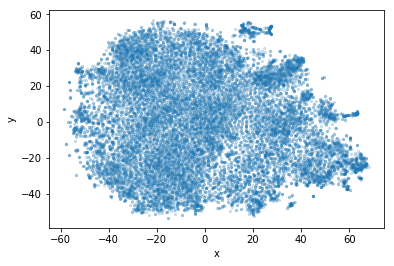

In [29]:
_=coords_df.plot.scatter('x','y',marker='.',alpha=0.2)

In [30]:
output_notebook()

Loading BokehJS ...

In [31]:
subset_df=coords_df.sample(n=1000)

In [32]:
subset_df.head()

,x,y,tokens
5042,-24.295912,29.736753,refusing
12965,-26.811319,-18.159704,Dewdrop
11227,-16.681005,-45.275040,billows
7311,-22.819521,12.635876,uncommonly
10157,6.988526,-47.166466,tails


In [33]:
p=figure(plot_width=600,plot_height=600)
_=p.text(x=subset_df.x,y=subset_df.y,text=subset_df.tokens)

In [34]:
show(p)

In [35]:
df1=coords_df.loc[coords_df['tokens'].isin(['son','daughter','husband','wife'])]

In [36]:
df1

,x,y,tokens
382,60.186871,-8.666590,husband
434,60.395267,-9.136819,daughter
480,60.263504,-8.814927,wife
779,60.782856,-20.623930,son


In [37]:
p=figure(plot_width=600,plot_height=600)
_=p.text(x=df1.x,y=df1.y,text=df1.tokens)

In [38]:
show(p)